In [1]:
import warnings
warnings.filterwarnings('ignore')

# California Housing Prices - Regressão
 
https://www.kaggle.com/datasets/camnugent/california-housing-prices

Descrição de cada atributo:

- longitude: Uma medida de quão longe uma casa está a oeste; um valor mais alto está mais a oeste
- latitude: Uma medida de quão ao norte uma casa está; um valor mais alto está mais ao norte
- habitaçãoMedianAge: Idade mediana de uma casa dentro de um quarteirão; um número mais baixo é um edifício mais novo
- totalRooms: número total de quartos dentro de um bloco
- totalBedrooms: Número total de quartos dentro de um quarteirão
- população: número total de pessoas que residem dentro de um quarteirão
- domicílios: número total de domicílios, grupo de pessoas que residem dentro de uma unidade domiciliar, para um quarteirão
- medianIncome: Renda mediana para famílias dentro de um quarteirão de casas (medida em dezenas de milhares de dólares americanos)
- medianHouseValue: valor médio da casa para famílias dentro de um quarteirão (medido em dólares americanos)
- oceanProximity: Localização da casa w.r.t oceano/mar

### Objetivo:

O objetivo é prever o median_house_value para uma casa na Califórnia, considerando vários outros atributos dessa casa.


https://www.kaggle.com/code/archanags001/california-housing-prices-prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error,make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

## EDA

In [4]:
df = pd.read_csv('housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.info(),df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(None,
 longitude               0
 latitude                0
 housing_median_age      0
 total_rooms             0
 total_bedrooms        207
 population              0
 households              0
 median_income           0
 median_house_value      0
 ocean_proximity         0
 dtype: int64)

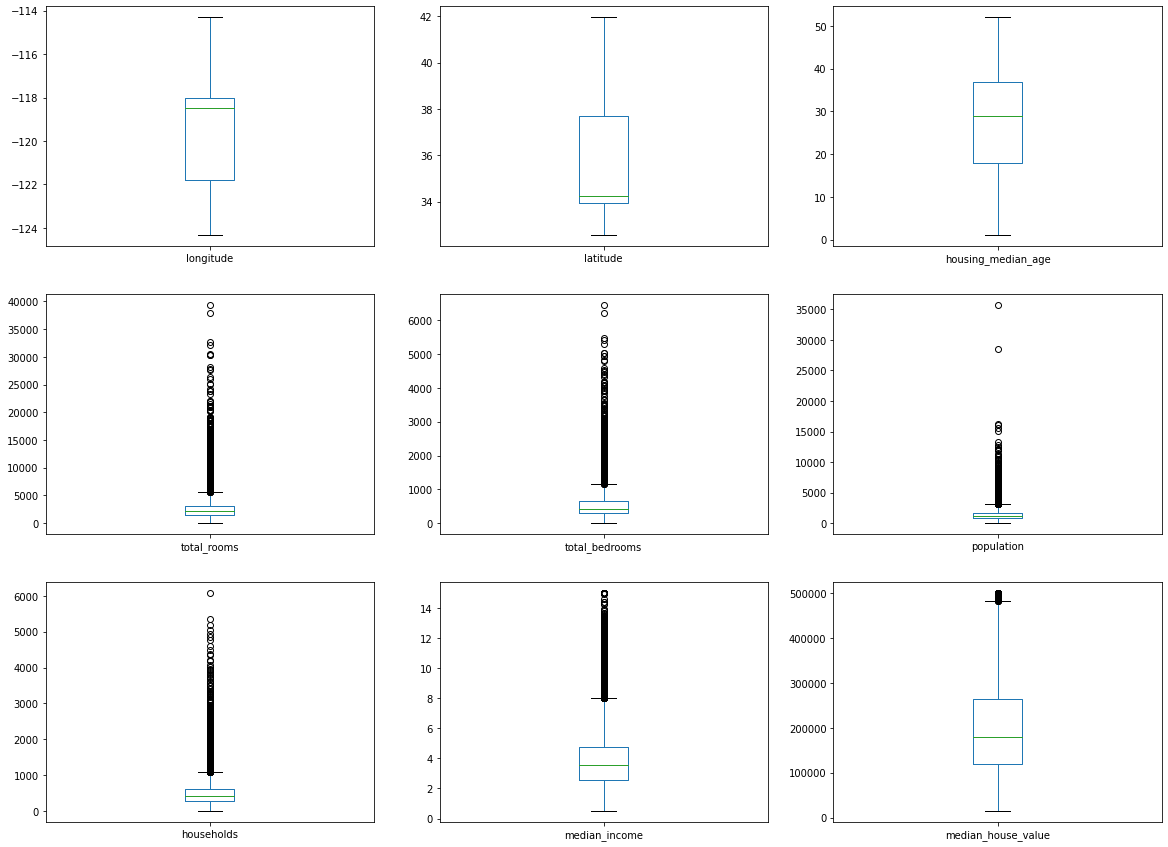

In [6]:
df.plot(kind='box', figsize=(20,15), subplots=True, layout=(3,3))
plt.show()

In [7]:
def outlier_check(data_check):
  q1 = data_check.quantile(0.25)
  q3 = data_check.quantile(0.75)
  iqr = q3-q1
  lower_limit = q1 - 1.5*iqr
  upper_limi = q3 + 1.5*iqr
  lower_outlier = data_check < lower_limit
  upper_outlier = data_check > upper_limi
  return   data_check[(lower_outlier | upper_outlier)]

# Let's see the outliers percentage in every column
for col_name,values in df.items():
  if df[col_name].dtype == "float64":
    percntge = (len(outlier_check(df[col_name]))/len(df))*100
    print(col_name, ":", percntge,"%")

longitude : 0.0 %
latitude : 0.0 %
housing_median_age : 0.0 %
total_rooms : 6.2354651162790695 %
total_bedrooms : 6.157945736434108 %
population : 5.794573643410852 %
households : 5.910852713178294 %
median_income : 3.299418604651163 %
median_house_value : 5.188953488372093 %


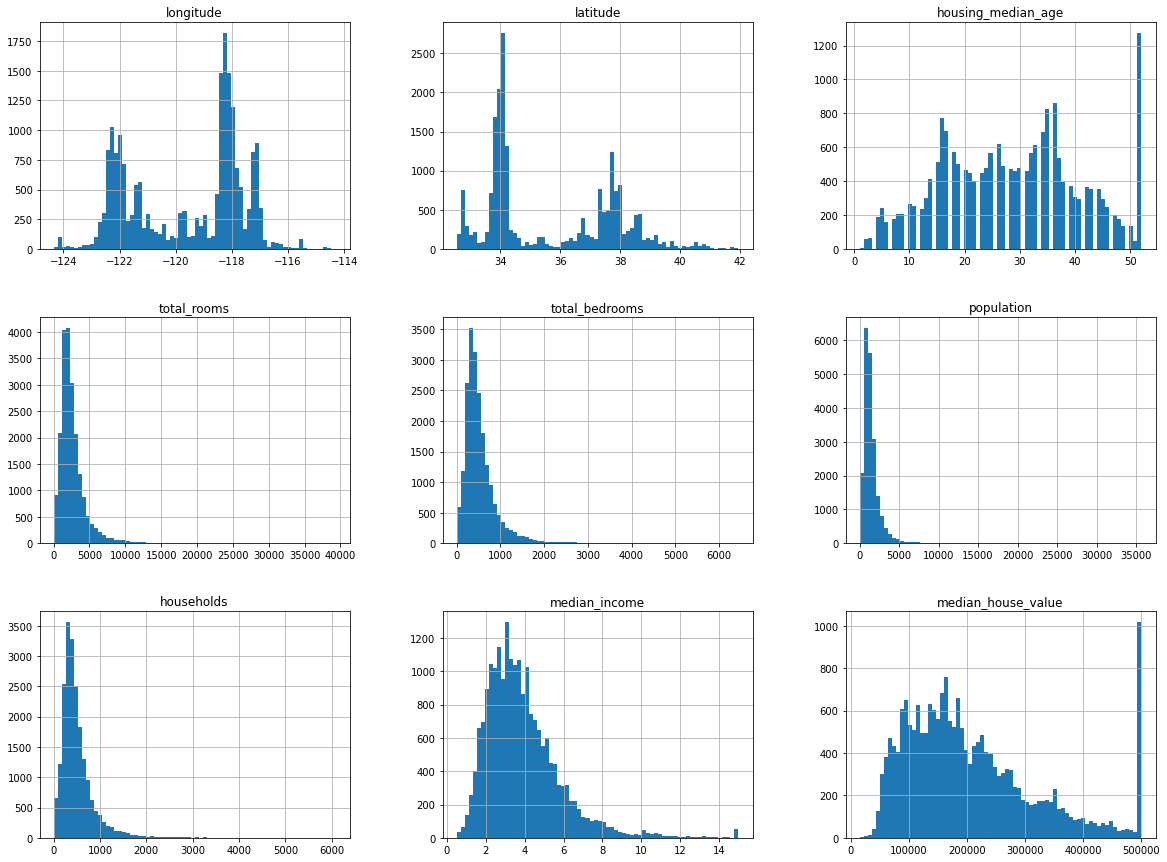

In [8]:
df.hist(bins=70, figsize=(20,15))
plt.show()

### Conclusão

- A partir do box plot é possível concluir que todas as colunas exceto "longitude", "latitude" e "housing_median_age" possuem valores discrepantes e a medida percentual de valores discrepantes de cada coluna não é superior a 7%.

- A coluna "total_bedrooms" possui 207 valores ausentes. Como existem alguns valores discrepantes na mesma coluna, usaremos a mediana dessa coluna para imputar os valores ausentes usando o método sklearn.imput (SimpleImputer(strategy="median")).

- Do histograma acima, vamos ver nossa distribuição de dados
    -  Temos algumas distribuições de dados distorcidas (menos centralizadas).
    - "median_house_value" tem um pico ímpar em seu valor máximo (cerca de 500k), o que pode ser um valor discrepante.
    - "housing_median_age" tendo muitos picos locais, mas um pico realmente estranho no valor máximo se destaca (housing_median_age= 50). Casas de certa idade mediana não estão presentes nos dados.
    - "total_rooms", "total_bedrooms", "population", "household" têm distribuição semelhante que é enviesada para valores menores.

### Correlation

<AxesSubplot:>

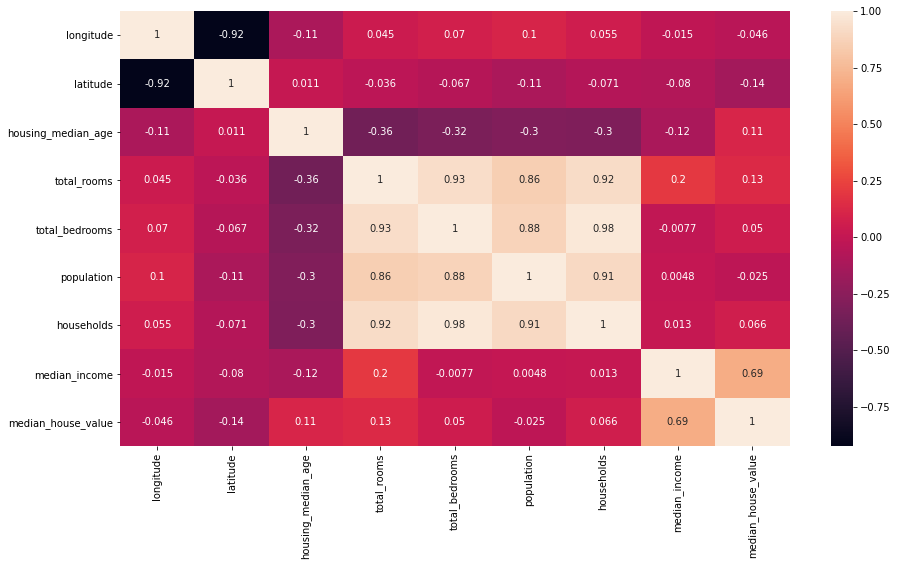

In [9]:
fig = plt.figure(figsize =(15,8))
sns.heatmap(df.corr(),annot= True)

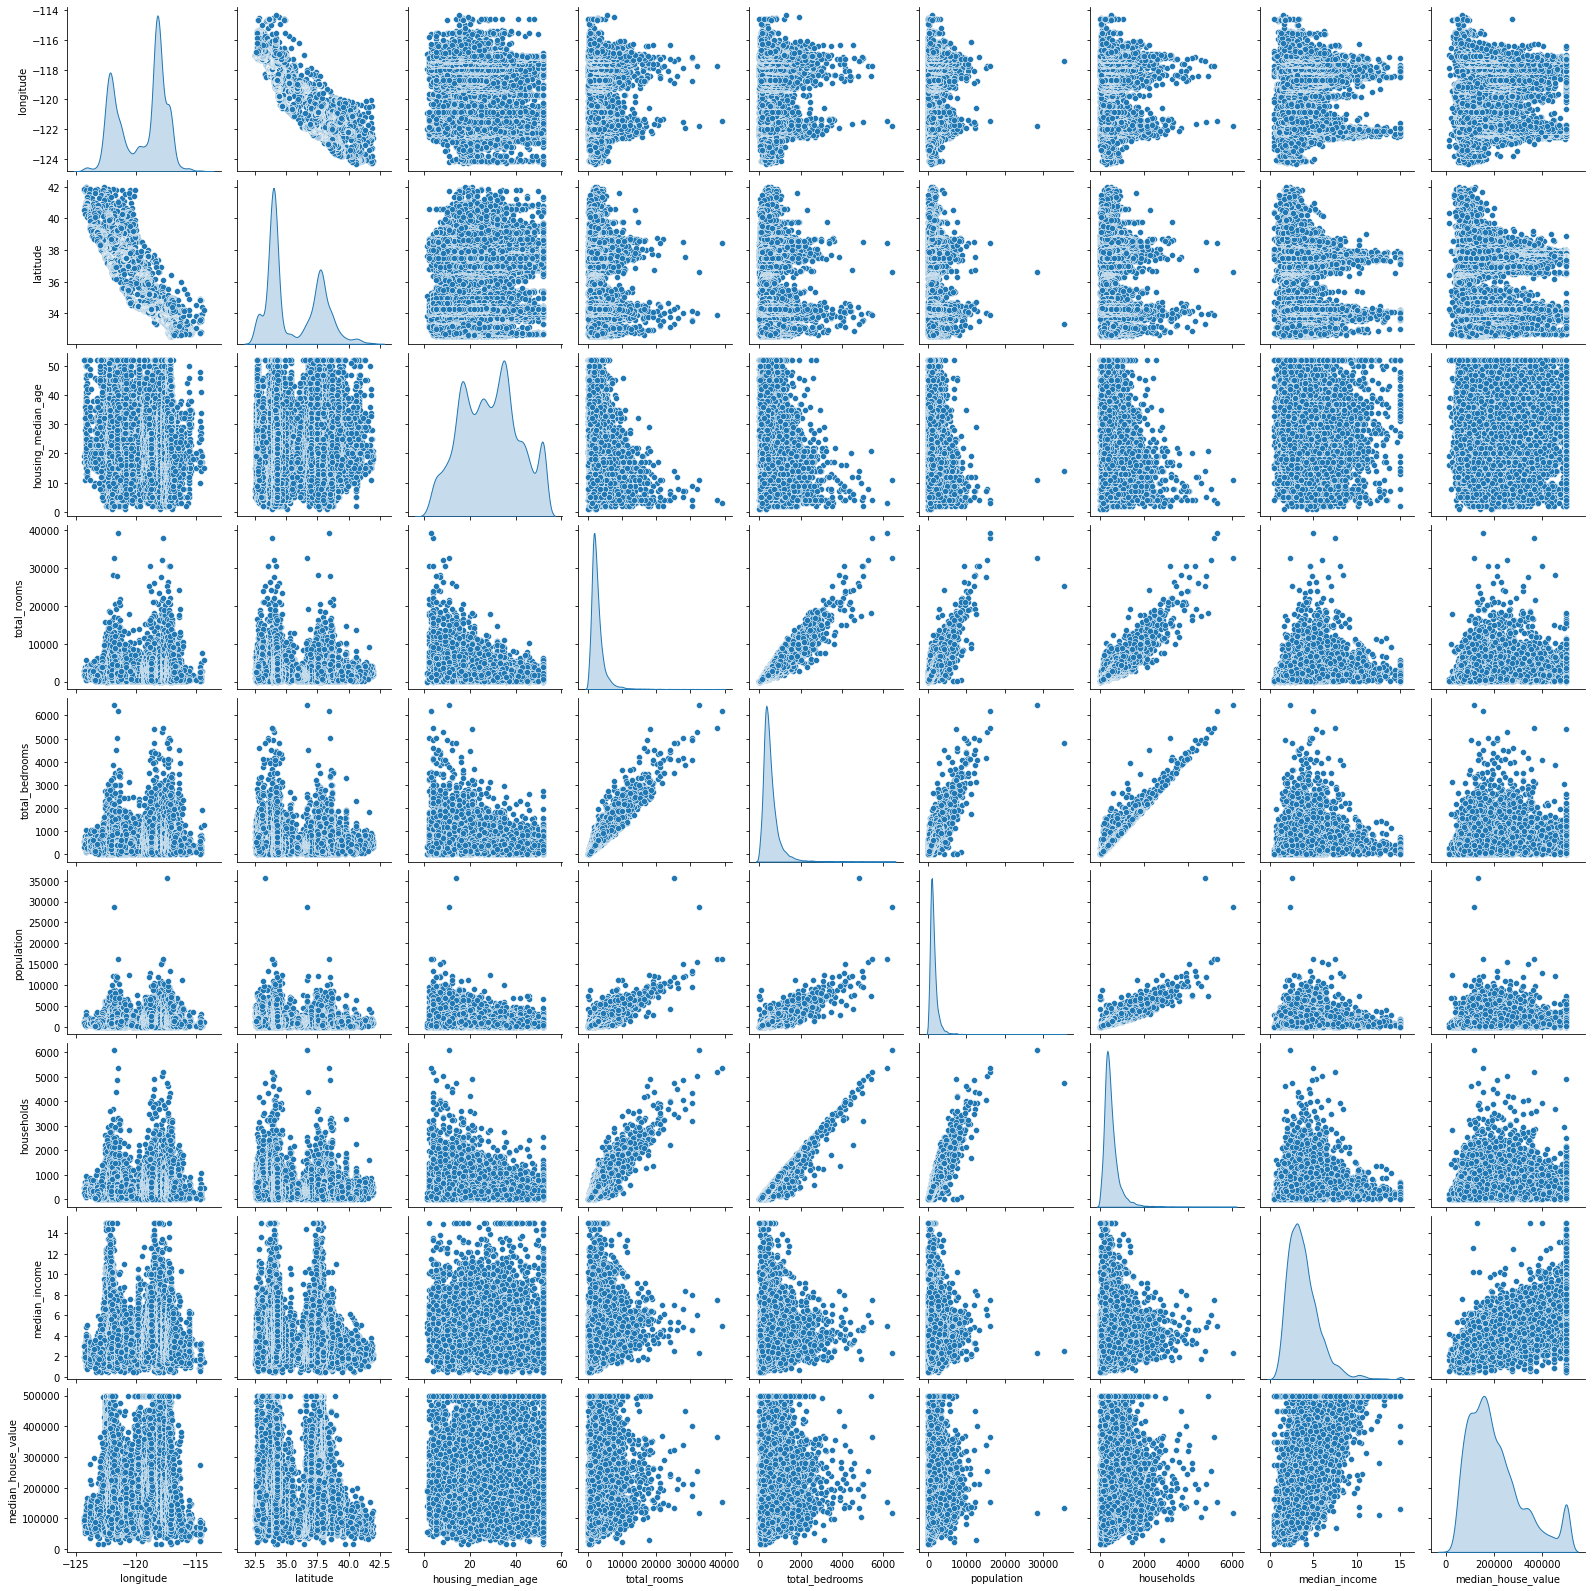

In [10]:
sns.pairplot(df, diag_kind="kde")

Text(0, 0.5, 'Latitude')

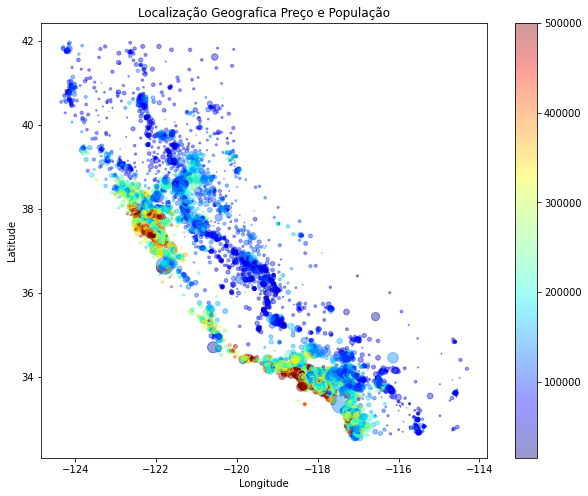

In [11]:
fig = plt.figure(figsize =(10,8))
plt.scatter(x =df.longitude,y = df.latitude , alpha=0.4, s=df['population']/100,label=df.population,c=df.median_house_value,cmap=plt.get_cmap('jet'))
plt.colorbar()
plt.title('Localização Geografica Preço e População')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Conclusão

Do mapa de calor e diagrama de pares acima:

- O gráfico de pares fornece uma breve visão geral de como cada variável se comporta em relação a todas as outras variáveis. Por exemplo, a coluna "median_house_value" (nossa variável de destino) está negativamente correlacionada com os recursos "longitude", "latitude" e população.
- Os recursos têm escalas de eixo bastante diferentes, portanto, a escala deve definitivamente ser considerada.
- A relação entre "median_house_value", "median_income" é quase linear
- A relação "houseing_median_age" vs "median_house_value" mostra que os dados estão completamente espalhados por todo o lugar

Do Mapa Geografico:

O raio da bolha representa a população do distrito e a cor da bolha mostra o valor médio da casa. ex: bolhas com cor vermelha mostram bairros com casas caras. A uma relação direta entre a distância do Mar e o preço das casas


## Train Test Split

In [5]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

In [6]:
df_dummy = pd.get_dummies(df,columns=['ocean_proximity'], drop_first=True)
df_dummy.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


In [7]:
X = df_dummy.drop("median_house_value", axis=1)
y = df_dummy["median_house_value"].copy()

In [10]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state= 13)
print(train_X.shape, train_y.shape,test_X.shape, test_y.shape)

(15480, 12) (15480,) (5160, 12) (5160,)


# Model Tunning And Validation

In [12]:
models = []
models.append(('LR', LinearRegression(),{"fit_intercept": [True, False]}))
models.append(('RD', Ridge(), {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False]}))
models.append(('LSS', Lasso(),{'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False]}))
models.append(('ELN', ElasticNet(), {"alpha": [1,0.1,0.01,0],"l1_ratio":[1,0.1,0.01,0]}))
models.append(('SVR', SVR(gamma='auto'),{'C': [500000,1000000],'kernel': ['linear']}))
# evaluate each model in turn
scoring = {'R2':'r2','MSE':make_scorer(mean_squared_error),'MAPE':make_scorer(mean_absolute_percentage_error)}

scores_map = pd.DataFrame()

for name, model,params in models:
    tuned_model = GridSearchCV(estimator=model, 
                   param_grid=params,
                   scoring=scoring, 
                   verbose=1,
                   refit = 'R2',
                   cv =  8,
                   return_train_score=True)
    tuned_model.fit(X,y)
    #cv_results = cross_val_score(tuned_model, X, y, cv=10, scoring="neg_mean_squared_error")
    cv_results = pd.DataFrame(tuned_model.cv_results_)
    print("***** ", name, "*****")
    best_result = cv_results[cv_results['params']==tuned_model.cv_results_['params'][tuned_model.best_index_]]
    best_result['model'] = name
    scores_map = scores_map.append(best_result)
    

Fitting 8 folds for each of 2 candidates, totalling 16 fits
*****  LR *****
Fitting 8 folds for each of 12 candidates, totalling 96 fits


C:\Users\Olist\AppData\Local\Temp/ipykernel_15840/3754760959.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result['model'] = name


*****  RD *****
Fitting 8 folds for each of 12 candidates, totalling 96 fits


C:\Users\Olist\AppData\Local\Temp/ipykernel_15840/3754760959.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result['model'] = name
C:\Users\Olist\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:681: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Olist\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Olist\AppData\Local\Programs\Python\Python39\lib\si

*****  LSS *****
Fitting 8 folds for each of 16 candidates, totalling 128 fits


C:\Users\Olist\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.164e+14, tolerance: 2.459e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Olist\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.131e+14, tolerance: 2.392e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fi

*****  ELN *****
Fitting 8 folds for each of 2 candidates, totalling 16 fits
*****  SVR *****


C:\Users\Olist\AppData\Local\Temp/ipykernel_15840/3754760959.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_result['model'] = name


In [14]:
scores_map.to_excel('results.xlsx',index=False)

# Result Analysis

In [12]:
results = pd.read_excel('results.xlsx')
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_R2,split1_test_R2,split2_test_R2,split3_test_R2,...,split5_train_MAPE,split6_train_MAPE,split7_train_MAPE,mean_train_MAPE,std_train_MAPE,model,param_alpha,param_l1_ratio,param_C,param_kernel
0,0.007117,0.000929,0.001133,0.000329,1.0,{'fit_intercept': True},0.330094,0.594375,0.568418,0.607507,...,0.286936,0.279740,0.291045,0.285434,0.004769,LR,NaN,NaN,NaN,NaN
1,0.003878,0.000781,0.000998,0.000005,1.0,"{'alpha': 0.1, 'fit_intercept': True}",0.329292,0.593745,0.567062,0.606789,...,0.286685,0.279619,0.290946,0.285316,0.004777,RD,0.1,NaN,NaN,NaN
2,1.800986,0.111019,0.000211,0.000374,1.0,"{'alpha': 0, 'fit_intercept': True}",0.330094,0.594375,0.568418,0.607507,...,0.286936,0.279740,0.291045,0.285434,0.004769,LSS,0.0,NaN,NaN,NaN
3,1.907691,0.035806,0.001103,0.000345,NaN,"{'alpha': 0, 'l1_ratio': 1}",0.330094,0.594375,0.568418,0.607507,...,0.286936,0.279740,0.291045,0.285434,0.004769,ELN,0.0,1.0,NaN,NaN
4,14.943073,0.392266,0.867518,0.042002,NaN,"{'C': 1000000, 'kernel': 'linear'}",0.385138,0.578667,0.508483,0.576175,...,0.257352,0.250648,0.262183,0.257826,0.004523,SVR,NaN,NaN,1000000.0,linear


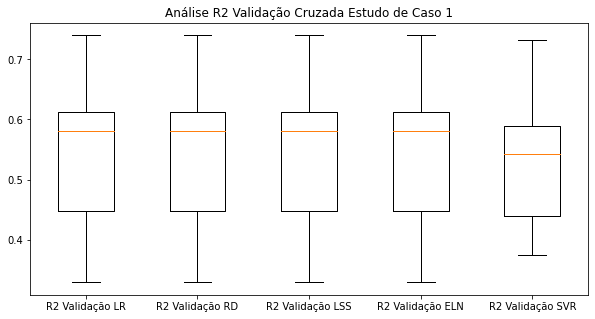

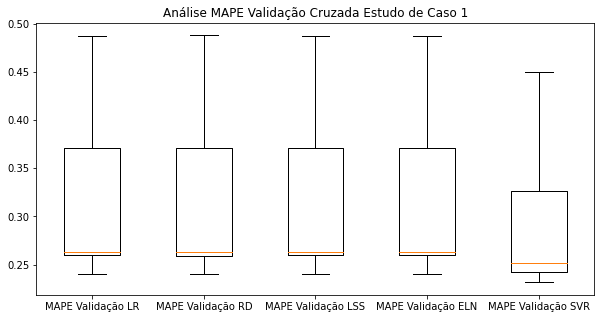

In [53]:
scoring = ['R2','MAPE']

final_transpose = pd.DataFrame()

for score in scoring:
    plotting = pd.DataFrame()
    for model in results['model']:

        transpose = results[results['model']==model].transpose().reset_index()
        transpose.rename(columns={transpose.columns[0]: 'param', transpose.columns[1]: model},inplace=True)
        test = transpose[(transpose['param'].str.contains('test_'+score))&(transpose['param'].str.contains('split'))]
        plotting[score+' Validação '+model] = test[model]

    fig1, ax1 = plt.subplots(figsize=(10,5))
    ax1.set_title('Análise {} Validação Cruzada Estudo de Caso 1'.format(score))
    ax1.boxplot(plotting)
    ax1.set_xticklabels(plotting.columns)
    final_transpose=pd.concat([final_transpose.reset_index(drop=True),plotting.reset_index(drop=True)], axis=1)

In [56]:
final_transpose.astype(float).describe().to_excel('results_describe.xlsx')